# Scoring futur

<img src="images/contexte.jpg">

<img src="images/schema_contraintes.jpg">

## La librairie

Cette librarie propose une **automatisation de la chaine de production de scores pour des données temporelles**.
Cette librairie python permet de dérouler la chaine de production de scores de bout en bout.
Les traitements Khiops sont automatisés via pykhiops, allant de la production du modèle à la restitution de scores par période predéfinies ainsi qu’à leur évaluation.
Les modules définis sont les suivants :



- **création du dataset**
    - sélection des cibles comprises dans un intervalle à spécifier
    - constitution des deux datasets train et test


- **modélisation**


- **déploiement sur une période fixe et/ou sur une période mobile**
    - sur une période fixe définie (par exemple 1 mois en marketing)
    - sur une période mobile : les traitements sont effectués sur une période mobile définie en paramètre (par exemple 1, 7 ou 15 jours en marketing)


- **évaluation**
    - Réactif
    - Proactif

Le Tutoriel « tuto_librairie_churn_xdsl.py » permet d’exécuter la librairie sur un jeu de données de churn xdsl, pour comparer les performances entre le modèle sur une période d’un mois actuellement utilisé et les modèles sur les périodes de 1, 7 ou 15 jours.

In [1]:
!pip install matplotlib
!pip install numpy
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## Démo

In [2]:
!pwd

/home/prollier/kastor/notebook


In [3]:
cd ../

/home/prollier/kastor


In [4]:
import os
import sys
import datetime

DataPath = os.path.join("/home/prollier/kastor")
DataLibPath = os.path.join(DataPath,"kastor")
if not DataLibPath in sys.path:
    sys.path.append(DataLibPath)

### Specifications

In [5]:
repertoire_donnees = os.path.join(DataPath,"tutorial","data","synth1")
dictionnaire = os.path.join(repertoire_donnees,"sample2_synthetic_ids.kdic")
nom_var_id = 'ID'
sep = '\t'

# table principale : id, cible, date_cible, (datamart ou autres variables)
nom_fic_cible = os.path.join(repertoire_donnees,"sample2_synthetic_ids.csv")
target = 'TARGET'
main_target_modality = 1
default_target_modality = 0
nom_var_date_cible = 'EVENT_DATE'
#format_timestamp_cible = "%Y-%m-%d"

# periode de cible a prendre en compte pour la modelisation
start_date = datetime.date(2019, 9, 15)
target_end_date = datetime.date(2019, 11, 15)
#target_end_date = '2019-09-25'

# frequence de prediction et de deploiement : journalier : "days", heure : "hours", minute : "minutes"
period_unit = "days"
if period_unit not in ["days", "hours", "minutes"]:
    raise ValueError("frequence de deploiement à renseigner parmi : days, hours, minutes")

# tables secondaires : logs : id, timestamp, (autres variables)
nom_fic_logs_1 = os.path.join(repertoire_donnees,"sample2_synthetic_log.csv")
nom_var_date_log_1 = 'EVENT_DATE'
#format_timestamp_log = "%Y-%m-%d %H:%M:%S"
format_timestamp_log = "%d/%m/%Y %H:%M:%S"
print(format_timestamp_log)
# répertoire étude
repertoire_resultats = os.path.join(DataPath,"tutorial","new_tests","synth1")


# modèle
#nom_fic_train = 'train_' + nom_fic_cible
model_gap = 7  # tau # a exprimer dans la meme unite que period_unit
input_data_duration = 60   # L # a exprimer dans la meme unite que period_unit
# modele mobile
target_duration = 15  # l # profondeur d observation de la cible a exprimer dans la meme unite que period_unit (ex:1, 7, ou 15)

# déploiement
#nom_fic_test = 'test_' + nom_fic_cible
depl_start_date = datetime.date(2019, 9, 15) #'2019-09-15'
period_nb = 30

# evaluation
#nb_cibles = 45    # pour constituer la table pivot, par défaut period_nb + target_duration


%d/%m/%Y %H:%M:%S


In [6]:
# data_table : définition des données et de leurs liens key et datetime
data_tables = {
    # nom de la table principale avec la cible horodatée
   "main_table": {
        "name_main_table": "name of the main table",
        "file_name": nom_fic_cible,
        "key": nom_var_id
        },
   # tables de logs
   "tables": {
        "LOGS": {
            "file_name": nom_fic_logs_1,
            "key": nom_var_id,
            "datetime": nom_var_date_log_1
            }
        }
    }

# Paramètres liés à la cible (dans la table principale)
target_parameters = {
    "datetime": nom_var_date_cible,
    "target": target,
    "main_target_modality": main_target_modality,  # optionnel
    "default_target_modality": default_target_modality  # optionnel
    }

# Paramètres temporels de l'étude
temporal_parameters = {
    "period_unit" : period_unit,
    "input_data_duration" : input_data_duration,
    "model_gap" : model_gap,
    "target_duration" : target_duration,
    "start_date": start_date,
    "target_end_date": target_end_date, # optionnel
    "depl_start_date": depl_start_date, # optionnel, start_date si non renseigné
    "period_nb": period_nb  ### je me dmende si celui ci est vraiment necessaire il est dependant des données et pas de la définititon du problème
    }


### Creation dataset

   selection des cibles comprises dans l'intervalle specifie
   
   tirage aleatoire d une date pour les non cibles (parmi les dates de logs si l intervalle correspond, parmi les dates de cible sinon)
   
   constitution des deux datasets train et test

In [7]:
!pwd

/home/prollier/kastor


In [8]:
import kastor.kastor as kt

mydataset = kt.Dataset(dictionnaire, data_tables, target_parameters, temporal_parameters)

mydataset.generate_train_test()

/home/prollier/.local/lib/python3.7/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


format_date >> %d/%m/%Y
format_date >> %d/%m/%Y
/home/prollier/kastor/tutorial/data/synth1/sample2_synthetic_ids.csv --> 12017 lignes

          ID  EVENT_DATE
TARGET                  
0       7046           0
1       4971        4971


timestamp min: 2019-09-02 00:00:00
timestamp max: 2019-11-30 00:00:00
format_date >> %d/%m/%Y
format_date >> %d/%m/%Y


/home/prollier/kastor/tutorial/data/synth1/sample2_synthetic_log.csv --> 798379 lignes

timestamp log format : %d/%m/%Y %H:%M:%S

timestamp min: 2019-05-20 00:12:10
timestamp max: 2019-11-15 23:58:37

Nombre de cibles avec modalite 1 comprises dans l intervalle specifie : 3404

Duree d execution de l'affectation d une date aleatoire aux cibles 0 : 2s


### Modelisation sur periode fixe

In [9]:
mydataset.mobile=False
mydataset.fit()

format_date >> %d/%m/%Y
format_date >> %d/%m/%Y
fichier train : /home/prollier/kastor/tutorial/data/synth1/train_sample2_synthetic_ids.csv
dictionnaire :/home/prollier/kastor/tutorial/data/synth1/sample2_synthetic_ids.kdic


/home/prollier/kastor/kastor/kastor.py:1189: UserWarning: Khiops ended correctly but there were minor issues
Warnings in log:
Line 1: warning : Data table /home/prollier/kastor/tutorial/data/synth1/sample2_synthetic_log.csv : Record 299 : Ignored record, orphan record LOGS[ID00002] with key inferior to that of the including record TablePrincipale[ID00003]
Line 2: warning : Data table /home/prollier/kastor/tutorial/data/synth1/sample2_synthetic_log.csv : Record 300 : Ignored record, orphan record LOGS[ID00002] with key inferior to that of the including record TablePrincipale[ID00003]
Line 3: warning : Data table /home/prollier/kastor/tutorial/data/synth1/sample2_synthetic_log.csv : Record 301 : Ignored record, orphan record LOGS[ID00002] with key inferior to that of the including record TablePrincipale[ID00003]
Line 4: warning : Data table /home/prollier/kastor/tutorial/data/synth1/sample2_synthetic_log.csv : Record 302 : Ignored record, orphan record LOGS[ID00002] with key inferior to 

### Deploiement sur periode fixe
   marketing avec datamart : 1 mois
   
   home in : 

In [10]:
mydataset.predict()

fichier test : /home/prollier/kastor/tutorial/data/synth1/test_sample2_synthetic_ids.csv
format_date >> %d/%m/%Y
format_date >> %d/%m/%Y
--> nombre de déploiements 1 -> OK


/home/prollier/kastor/kastor/kastor.py:1837: UserWarning: Khiops ended correctly but there were minor issues
Warnings in log:
Line 2: warning : Data table /home/prollier/kastor/tutorial/data/synth1/sample2_synthetic_log.csv : Record 2 : Ignored record, orphan record SNB_LOGS[ID00001] with key inferior to that of the including record SNB_TablePrincipale[ID00002]
Line 3: warning : Data table /home/prollier/kastor/tutorial/data/synth1/sample2_synthetic_log.csv : Record 3 : Ignored record, orphan record SNB_LOGS[ID00001] with key inferior to that of the including record SNB_TablePrincipale[ID00002]
Line 4: warning : Data table /home/prollier/kastor/tutorial/data/synth1/sample2_synthetic_log.csv : Record 4 : Ignored record, orphan record SNB_LOGS[ID00001] with key inferior to that of the including record SNB_TablePrincipale[ID00002]
Line 5: warning : Data table /home/prollier/kastor/tutorial/data/synth1/sample2_synthetic_log.csv : Record 5 : Ignored record, orphan record SNB_LOGS[ID00001] w

### Evaluation
   constitution de la table des scores et cibles journaliers (table pivot)
   
   calcul des indicateurs : precision, rappel et gain (avec timeevalscore.py)


In [11]:
%load_ext autoreload
%autoreload 2
mydataset.evaluate()

fichier test : /home/prollier/kastor/tutorial/data/synth1/test_sample2_synthetic_ids.csv
format_date >> %d/%m/%Y
format_date >> %d/%m/%Y
score_15/09/2019
score_16/09/2019
score_17/09/2019
score_18/09/2019
score_19/09/2019
score_20/09/2019
score_21/09/2019
score_22/09/2019
score_23/09/2019
score_24/09/2019
score_25/09/2019
score_26/09/2019
score_27/09/2019
score_28/09/2019
score_29/09/2019
score_30/09/2019
score_01/10/2019
score_02/10/2019
score_03/10/2019
score_04/10/2019
score_05/10/2019
score_06/10/2019
score_07/10/2019
score_08/10/2019
score_09/10/2019
score_10/10/2019
score_11/10/2019
score_12/10/2019
score_13/10/2019
score_14/10/2019
Ecriture du fichier de resultats de l evaluation reactif : /home/prollier/kastor/tutorial/data/synth1/fixe/eval_table_pivot_depl30.csv_reactif.xls
Ecriture du fichier de resultats de l evaluation reactif : /home/prollier/kastor/tutorial/data/synth1/fixe/eval_table_pivot_depl30.csv_reactif.json
Ecriture du fichier de resultats de l evaluation proactif 

### Representations graphiques
   courbes par top scores des deux metriques : precision et rappel


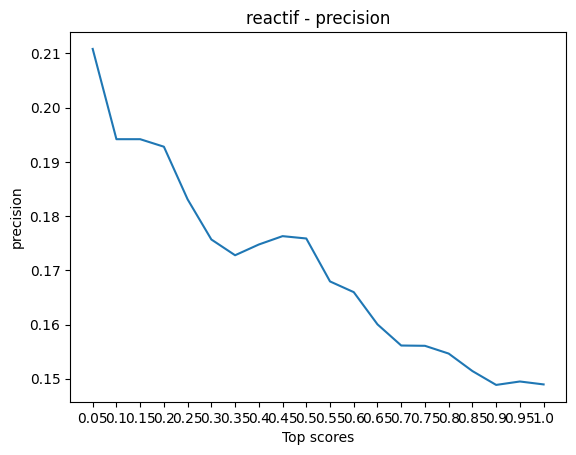

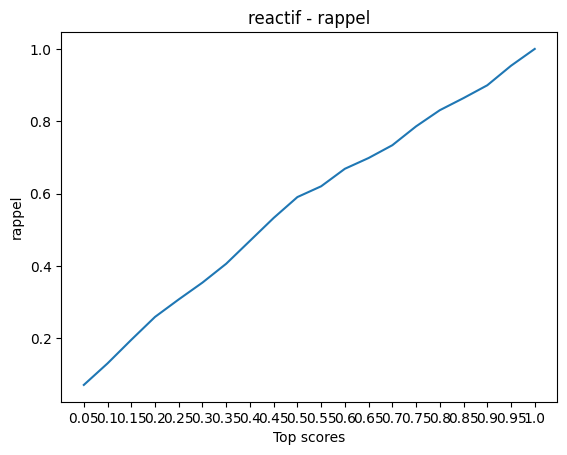

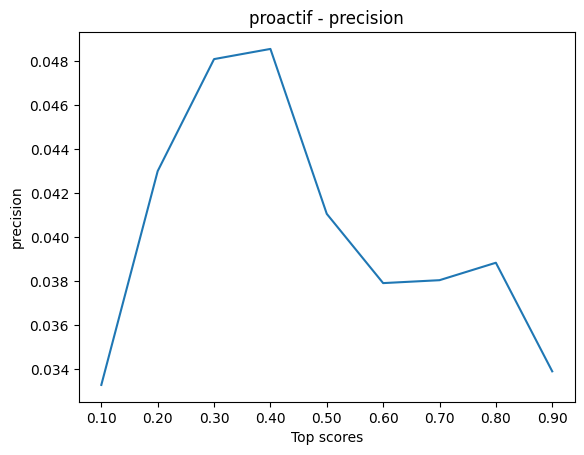

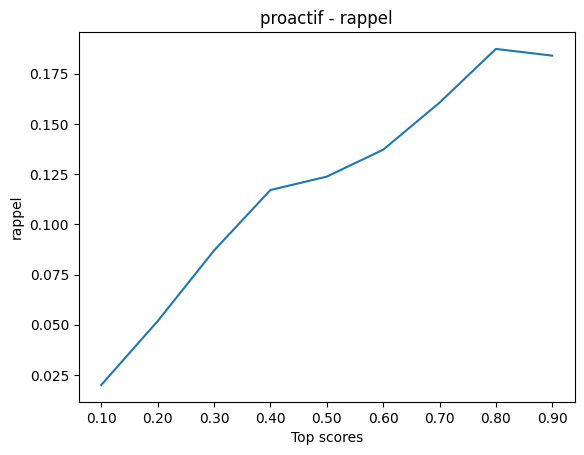

In [12]:
mydataset.plot()

### Modelisation sur periode mobile

In [13]:
mydataset.mobile=True
mydataset.fit()

format_date >> %d/%m/%Y
format_date >> %d/%m/%Y
fichier train : /home/prollier/kastor/tutorial/data/synth1/train_sample2_synthetic_ids_target15.csv
dictionnaire :/home/prollier/kastor/tutorial/data/synth1/sample2_synthetic_ids.kdic


/home/prollier/kastor/kastor/kastor.py:1189: UserWarning: Khiops ended correctly but there were minor issues
Warnings in log:
Line 1: warning : Data table /home/prollier/kastor/tutorial/data/synth1/sample2_synthetic_log.csv : Record 299 : Ignored record, orphan record LOGS[ID00002] with key inferior to that of the including record TablePrincipale[ID00003]
Line 2: warning : Data table /home/prollier/kastor/tutorial/data/synth1/sample2_synthetic_log.csv : Record 300 : Ignored record, orphan record LOGS[ID00002] with key inferior to that of the including record TablePrincipale[ID00003]
Line 3: warning : Data table /home/prollier/kastor/tutorial/data/synth1/sample2_synthetic_log.csv : Record 301 : Ignored record, orphan record LOGS[ID00002] with key inferior to that of the including record TablePrincipale[ID00003]
Line 4: warning : Data table /home/prollier/kastor/tutorial/data/synth1/sample2_synthetic_log.csv : Record 302 : Ignored record, orphan record LOGS[ID00002] with key inferior to 

### Deploiement sur periode mobile, selon period_unit
   marketing : deploiement journalier
        
   home in : deploiement heure ou minute ?

In [14]:
mydataset.predict()

fichier test : /home/prollier/kastor/tutorial/data/synth1/test_sample2_synthetic_ids.csv
format_date >> %d/%m/%Y
format_date >> %d/%m/%Y
fichier deploiement : /home/prollier/kastor/tutorial/data/synth1/test_sample2_synthetic_ids_target15.csv


/home/prollier/kastor/kastor/kastor.py:1887: UserWarning: Khiops ended correctly but there were minor issues
Warnings in log:
Line 2: warning : Data table /home/prollier/kastor/tutorial/data/synth1/sample2_synthetic_log.csv : Record 2 : Ignored record, orphan record SNB_LOGS[ID00001] with key inferior to that of the including record SNB_TablePrincipale[ID00002]
Line 3: warning : Data table /home/prollier/kastor/tutorial/data/synth1/sample2_synthetic_log.csv : Record 3 : Ignored record, orphan record SNB_LOGS[ID00001] with key inferior to that of the including record SNB_TablePrincipale[ID00002]
Line 4: warning : Data table /home/prollier/kastor/tutorial/data/synth1/sample2_synthetic_log.csv : Record 4 : Ignored record, orphan record SNB_LOGS[ID00001] with key inferior to that of the including record SNB_TablePrincipale[ID00002]
Line 5: warning : Data table /home/prollier/kastor/tutorial/data/synth1/sample2_synthetic_log.csv : Record 5 : Ignored record, orphan record SNB_LOGS[ID00001] w

--> nombre de déploiements 30 -> OK


### Evaluation
   constitution de la table des scores et cibles journaliers (table pivot)
    
   calcul des indicateurs : precision, rappel et gain (avec timeevalscore.py)

In [15]:
mydataset.evaluate()

fichier test : /home/prollier/kastor/tutorial/data/synth1/test_sample2_synthetic_ids.csv
format_date >> %d/%m/%Y
format_date >> %d/%m/%Y
score_15/09/2019
score_16/09/2019
score_17/09/2019
score_18/09/2019
score_19/09/2019
score_20/09/2019
score_21/09/2019
score_22/09/2019
score_23/09/2019
score_24/09/2019
score_25/09/2019
score_26/09/2019
score_27/09/2019
score_28/09/2019
score_29/09/2019
score_30/09/2019
score_01/10/2019
score_02/10/2019
score_03/10/2019
score_04/10/2019
score_05/10/2019
score_06/10/2019
score_07/10/2019
score_08/10/2019
score_09/10/2019
score_10/10/2019
score_11/10/2019
score_12/10/2019
score_13/10/2019
score_14/10/2019
Ecriture du fichier de resultats de l evaluation reactif : /home/prollier/kastor/tutorial/data/synth1/mobile/eval_table_pivot_depl30.csv_reactif.xls
Ecriture du fichier de resultats de l evaluation reactif : /home/prollier/kastor/tutorial/data/synth1/mobile/eval_table_pivot_depl30.csv_reactif.json
Ecriture du fichier de resultats de l evaluation proac

### Representations graphiques
   courbes par top scores des deux metriques : precision et rappel

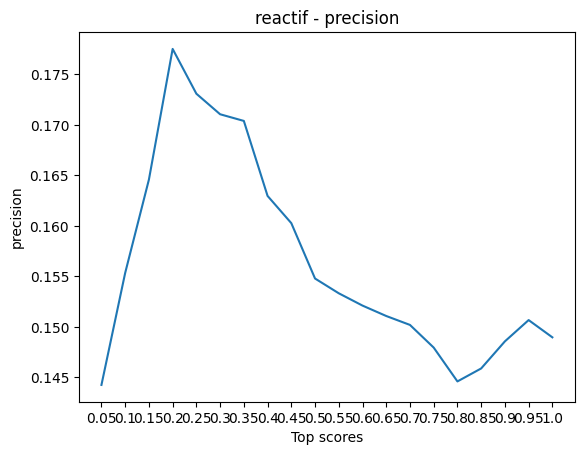

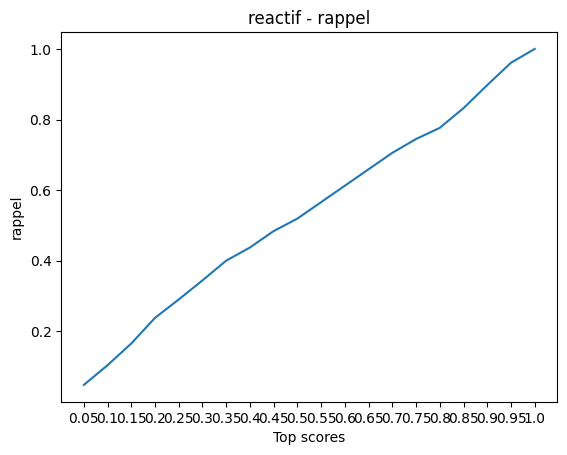

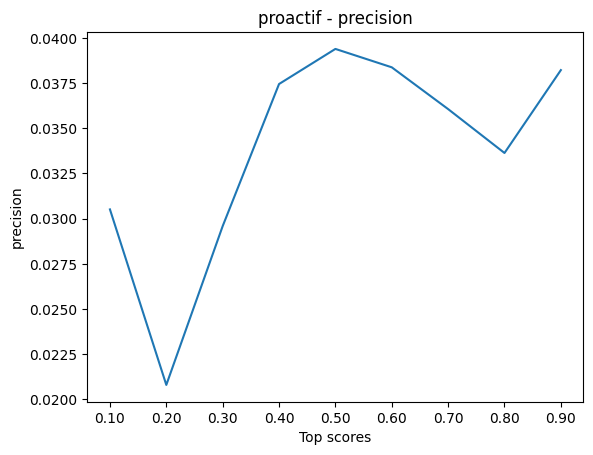

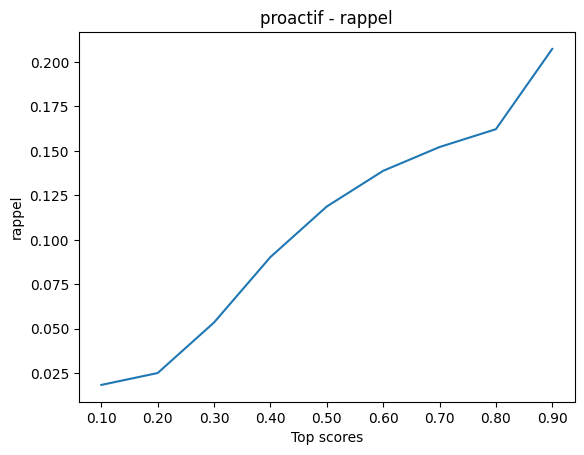

In [16]:
mydataset.plot()

In [17]:
depl_start_date = '2019-09-15'
from datetime import datetime
from dateutil import parser

# current dateTime
now = datetime.now()

# convert to string
date_time_str = now.strftime("%Y-%m-%d %H:%M:%S")
print('DateTime String:', date_time_str)
dt = parser.parse("06 April, 2019")
print(dt)
#parser.isoparse(

DateTime String: 2023-07-10 16:10:07
2019-04-06 00:00:00
